# CRN models of gene expression
Modal INF473L Ecole Polytechnique

F. Fages, Feb. 2020

In this session, we explore:
* the process of gene expression: activation by *promotor*, *trancription* in RNA, and *translation* in proteins (discovered by François Jacob and Jacques Monod, Nobel prize 1965)
* the stochastic effects caused by low numbers of molecules (a gene is in one single copy)
* the expressive power of autocatalysis

The importance of stochastic effects in gene expression will lead us in the sequel of the MODAL to favor programming with high numbers of molecules, i.e. using proteins, enzymes and post-translational regulation, instead of gene networks.

A *gene* is sequence of DNA which codes for an *RNA*, itself coding for a *protein*. 

The *RNA polymerase* is a protein complex which transcripts the *DNA sequence* of the gene in the corresponding *RNA sequence*. 

The binding of the RNA polymerase on the binding site of the DNA can be
* either spontaneous (*basal expression*)
* or facilitated by the binding of a *promotor* protein already bound on that site (*gene activation*)
* or inhibited by the binding of a repressor protein (*gene repression*)

<img src="gene.png" alt="gene.png" style="width: 400px;"/>

# Part I: Basal expression

* Transcription: gene + RNApolymerase => geneRNApolymerase => gene + RNApolymerase + RNAnucleus
<img src="transcription.png" alt="transcription.png" style="width: 500px;"/>
* Translocation: RNAnucleus => RNAcytoplasm
* Translation: RNAcytoplasm + ribosome => RNAcytoplasmRibosome => ribosome + protein 
<img src="translation.png" alt="translation.png" style="width: 500px;"/>

### Reaction-based modeling
* chemical reaction structure: `reactants => products`
* rate function: mass action law kinetics `MA(k)`, Michaelis-Menten kinetics `MM(v,k)`, any mathematical expression over the reactants

In [1]:
list_functions.

From inherited 'initial':
[0] function MA(k)=k*product(S*M in [reactants],M^S)
[1] function MAI(k)=k*product(S*M in [reactants],M^S)/(1+sum(M in [inhibitors],M))
[2] function MM(Vm, Km)=Vm*single_reactant/(Km+single_reactant)
[3] function Hill(Vm, Km, n)=Vm*single_reactant^n/(Km^n+single_reactant^n)
[4] function HillI(Vm, Km, n)=Vm*single_reactant^n/(Km^n+single_reactant^n+sum(M in [inhibitors],M^n))


In [2]:
MA(k1) for gene + RNApolymerase => geneRNApolymerase.

In [3]:
MA(k2) for geneRNApolymerase => gene + RNApolymerase.

In [4]:
MA(k3) for geneRNApolymerase => RNAnucleus + geneRNApolymerase.

In [5]:
MA(k4) for RNAnucleus => RNAcytoplasm.

In [6]:
MA(k5) for RNAcytoplasm + ribosome => RNAcytoplasmRibosome.

In [7]:
MA(k6) for RNAcytoplasmRibosome => protein + ribosome.

In [8]:
MA(k7) for protein => _.

In [9]:
parameter(k1=1, k2=1, k3=1, k4=1, k5=1, k6=1, k7=0.1).

### Initial state

In [10]:
present(gene, nbgene).
present(RNApolymerase, nbRNApolymerase).
present(ribosome, nbribosome).

In [11]:
parameter(nbgene=1, nbRNApolymerase=10, nbribosome=10).

### Chemical reaction network (CRN)
* hypergraph represented by a bipartite species-reactions graph

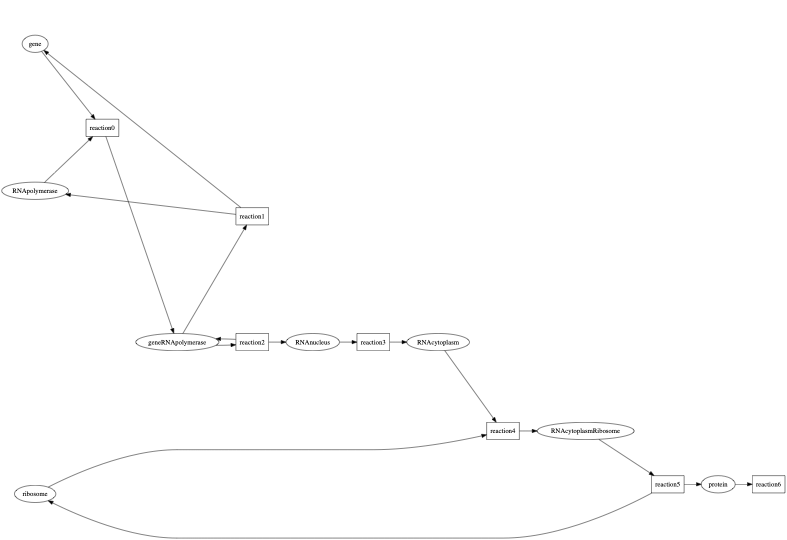

In [12]:
draw_reactions.

In [13]:
search_conservations.

gene+geneRNApolymerase
RNAcytoplasmRibosome+ribosome
RNApolymerase+geneRNApolymerase
3 complex invariant(s)


# Question 1) explain and interpret those 3 invariants
Your answer:

* 

* 

* 

* 



### Influence graph
* positive and negative influences between molecular species
* abstraction of the reaction hypergraph

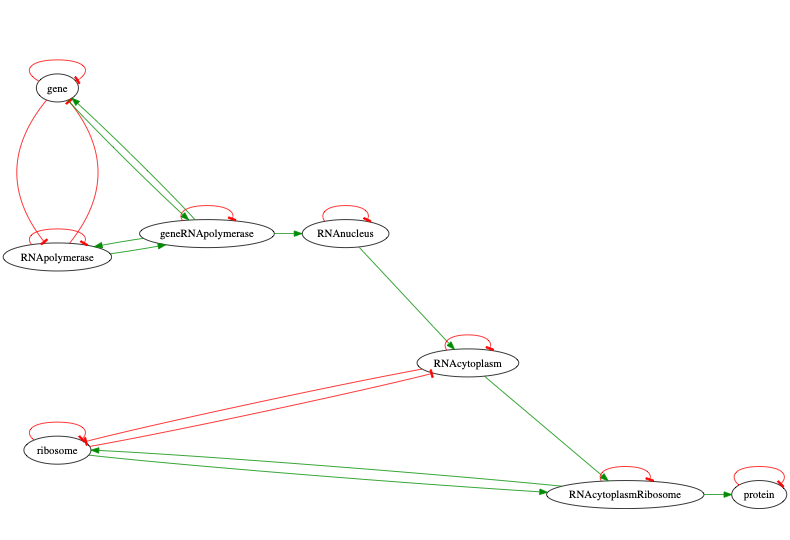

In [14]:
draw_influences.

### Differential semantics
* interpretration by Ordinary Differential Equation (ODE)

In [15]:
list_ode.

In [16]:
option(method:bsimp, time:50). numerical_simulation. plot.

In [17]:
%slider k1 k2 k3 k4 k5 k6 k7 nbgene nbribosome nbRNApolymerase

Box(children=(SelectionSlider(continuous_update=False, description='k1', index=10, layout=Layout(min_width='30…

### Stochastic semantics
* interpretation by continuous time Markov chain (CTMC)
* Stochastic simulation algorithm (SSA)
* numbers of molecules with conversion factor from concentration (100 by default) here 1 for gene in single copy
* reaction rates as propensities to react give probabilities of reactions after normalization
* time of next reaction given by exponential law

In [18]:
option(stochastic_conversion:1, method:ssa). % stochastic simulation with 1 molecule for 1 concentration unit

In [19]:
numerical_simulation. plot.

In [20]:
%slider k1 k2 k3 k4 k5 k6 k7 nbgene nbribosome nbRNApolymerase

Box(children=(SelectionSlider(continuous_update=False, description='k1', index=10, layout=Layout(min_width='30…

## The high level of noise due to stochasticity 
* may make us prefer to reason in the differential semantics
* but with the risk of missing qualitative behaviors only visible in the stochastic semantics

In [21]:
option(method:bsimp). % implicit method of integration for the differential semantics
numerical_simulation. plot.

# Part II: Gene expression control
* A *gene promotion factor* is a protein which binds to the gene (gene+promoter => genepromoter)
and which promotes the binding of RNApolymerase with a faster binding rate (genepromoter+RNApolymerase => geneRNApolymerase)
* A *gene inhibitor* is a protein which binds to the gene (gene+inhibitor => geneinhibitor) but prevents (instead of promoting) the binding of the RNA polymerase simply by the absence of binding rule of the RNA polymerase to the inhibited gene

# Question 2) Add reactions for promotion factor and inhibitor
* show how to control the expression of the gene by changing the concentraiton of promotion factor and inhibitor
* compare inhibition and absence of promotor


# Question 3) Find parameters to maintain a protein concentration equal to 5

# Question 4) Give a control law to obtain oscillations of the protein with a period of 24 time units
* Biocham events can be used to change the values of some parameters once a condition gets satisfied
* example add_time_event(Time>t, k1=0, k2=1, t=...).

# Part III: Autocatalysis 
* when the synthesized protein is (transformed to) the promoter of its own gene (protein => promoter)

# Question 5) Implement autocatalysis
* show the effect of autocatalysis in presence of an inhibitor
* both in the differential and stochastic semantics

# Part IV: Example of virus phage T7
The bacteriophage T7 is a virus that infects a cell with its DNA and uses the gene expression machinery of the cell to reproduce itself: 
* after translocation of the DNA of the virus through the membrane of the cell
* the infected DNA of the cell can
* replicate the DNA of the virus 
* and synthesize the structure proteins of the virus 
* to form a new virus that may leave the cell and infect other cells

<img src="t7entry.jpg" alt="t7entry.jpg" style="width: 600px;"/>

### This is one example where you will show that the differential and stochastic behaviors may be qualitatively very different
(one reason why some of you would survive and some would not)


In [22]:
load(T7).

In [23]:
list_model.

MA(c1) for DNA=>infectedDNA.
MA(c2) for infectedDNA=>_.
MA(c3) for infectedDNA=>DNA+infectedDNA.
MA(c4) for infectedDNA=>infectedDNA+struc.
MA(c5) for DNA+struc=>virus.
MA(c6) for struc=>_.
present(DNA).
parameter(
  c1 = 0.025,
  c2 = 0.25,
  c3 = 1,
  c4 = 1000,
  c5 = 7.5e-6,
  c6 = 1.99
).


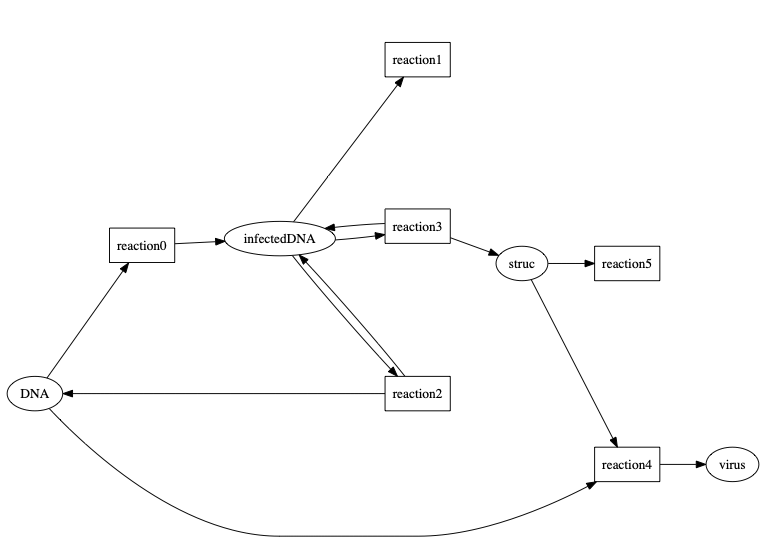

In [24]:
draw_reactions.

# Question 6) Show and explain the differential dynamics of the virus
.

.

.

.

# Question 7) Show and explain the different stochastic behaviors of the virus
Use stochastic_conversion 1 and time horizon 20 for efficiency reasons

. 

. 

. 

. 

# Part V: Competitive autocatalysis

Let us consider now the following diagram where two contiguous autocatalyzed genes share the same promotion site 

<img src="genetic_switch.png" alt="genetic_switch.png" style="width: 800px;"/>

In [25]:
clear_model.

# Question 8) Implement the genetic circuit above
* compare the differential and stochastic semantics


# Question 9) Compare the behaviors with low and high binding rates

* show the switching behaviors

# Question 10) Give a control law to switch every 12 units of time
* Biocham events can be used to change the values of some parameters once a condition gets satisfied
* example add_time_event(Time>10, k1=0, k2=1).